# I - Importations

In [1]:
import os
import pickle
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

# Constantes

In [2]:
DATASETS_PATH = "datasets/"
ARTICLES_METADATA_PATH = DATASETS_PATH + "articles_metadata.csv"
CLICKS_PATH = DATASETS_PATH + "clicks/"
CLICKS_HOUR_CONCATENATED_PATH = DATASETS_PATH + "clicks_hour_concatenated.csv"

# Fonctions

In [3]:
def perc_fill_rate(datas: pd.DataFrame)-> float:
    """Calculer le taux de remplissage
    
    Parameters:
    datas: Dataframe dont le taux de remplissage est à calculer

    Returns:
    float: taux de remplissage calculé
    """

    return 100 - datas.isna().sum() / len(datas) * 100

def make_title(texte:str):
    """Ecrit tout simplement un ###### texte #####
    Cette fonction a été crée pour éviter de répéter les mêmes écritures de print

    Parameters:
    texte -- Texte à afficher
    """

    print("\n###### " + texte + " ######\n")

def make_plot_dtypes(datas:pd.DataFrame):
    """Crée un camembert de répartition de types utilisés de la dataframe
    
    Parameters:
    datas: Dataframe dont on veut calculer la répartition des types utilisées
    """

    print(datas.dtypes.value_counts())
    plt.figure(figsize=(10,5))
    plt.pie(datas.dtypes.value_counts().values,autopct="%1.2f%%",labels=[str(types) for types in datas.dtypes.value_counts().index])
    plt.title("Répartition des types dans le jeu de données.")
    plt.ylabel("Type des données")
    plt.legend()
    plt.show()

def make_perc_missing_values_info(datas:pd.DataFrame, perc_missing_values_threshold: int = 50) -> sns.barplot:
    """Fonction qui affiche un diagramme en barres contenant le taux de remplissage pour chaque variable de la dataframe
    
    Parameters:
    datas: Dataframe dont on désire afficher le taux de remplissage sous forme d'un diagramme en barres
    perc_missing_values_threshold: Le seuil du pourcentage qui indique si une variable est exploitable ou non (par défaut : 50)
    
    Returns:
    sns.barplot: contient l'objet de barplot
    """

    # Calcul du taux de remplissage
    perc_fill_rate_datas = perc_fill_rate(datas)
    perc_fill_rate_datas = perc_fill_rate_datas.sort_values(ascending=False)

    # Définition de la palette de couleurs en fonction du taux de remplissage
    palette = ["red" if p < perc_missing_values_threshold else "orange" if p < 100 else "green" for p in perc_fill_rate_datas.values]

    display(perc_fill_rate_datas.index)
    display(perc_fill_rate_datas.values)

    # Création d'un grpahique à barres pour le taux de remplissage
    plt.figure(figsize=(25,5))
    sns.barplot(x=perc_fill_rate_datas.index, y=perc_fill_rate_datas.values, hue=perc_fill_rate_datas.index, palette=palette)
    plt.ylabel("Taux de remplissage")
    plt.xlabel("Variables")
    plt.xticks(rotation=90)
    plt.title("Taux de remplissage du fichier")

    # Mise en place d'une ligne rouge marquant le seuil décidé %
    line_seuil = plt.axhline(y=perc_missing_values_threshold, color="red", linestyle="--", label="seuil " + str(perc_missing_values_threshold) + "%")

    # Création et paramétrage des légendes à afficher
    red_patch = mpatches.Patch(color="red", label="< " + str(perc_missing_values_threshold) + "%")
    orange_patch = mpatches.Patch(color="orange", label= "" + str(perc_missing_values_threshold) + "-]100%")
    green_patch = mpatches.Patch(color='green', label='100%')
    plt.legend(handles=[line_seuil, red_patch, orange_patch, green_patch], title='Taux de remplissage', loc='upper right')
    plt.show()

    # Afficher une dataframe sur le taux de remplissage des variables
    var_with_missing_values = perc_fill_rate_datas.loc[perc_fill_rate_datas < 100].to_frame()
    var_with_missing_values = var_with_missing_values.reset_index()
    var_with_missing_values = var_with_missing_values.rename(columns={"index": "Variable", 0: "% Taux remplissage"})
    display(var_with_missing_values)

def analyse_outlier(df: pd.DataFrame):
    """Analyse affiche un boxplot de chaque variable numérique afin d'analyser les outliers
    
    Parameters:
    df: la dataframe dont on veut analyser les outliers
    """

    # Ne sélectionner que les variables numériques
    quantitatives = df.select_dtypes(include=["number"])

    make_title("Statistiques descriptives")
    display(quantitatives.describe())

    # Afficher les boxplots de chaque variable
    nb_var = len(quantitatives.columns)
    nb_cols = 5
    nb_rows = int(nb_var/nb_cols) + 1
    fig, axes = plt.subplots(nb_rows, nb_cols, figsize=(25, nb_rows * 5))
    for i, var in enumerate(quantitatives.columns):
        if nb_rows > 1:
            ax = axes[i // nb_cols, i % nb_cols]
        else:
            ax = axes[i // nb_cols]
        sns.boxplot(x=quantitatives[var], ax=ax)

    # Supprime les emplacements non utilisés
    for i in range(nb_var, nb_rows * nb_cols):
        fig.delaxes(axes.flatten()[i])

    make_title("Boxplots des variables")
    plt.show()
    
def analyse_exploratoire_generique(datas: pd.DataFrame, perc_missing_values_threshold: int = 50, nb_index: int = 1):
    """Effectue une analyse exploratoire générique

    Parameters:
    datas: la dataframe sur laquelle on veut effectuer une analyse exploratoire générique
    perc_missing_values_threshold: Le seuil du pourcentage de valeur manquant qui indique si une variable est exploitable ou non (par défaut: 50)
    nb_index: index de début d'analyse de doublons, utilisé pour analyser les doublons en dehors des index
    """

    # Présenter les informations générales
    make_title("Informations générales")
    datas.info()

    # Afficher la répartition des types dans le jeu de données
    make_title("Répartition des types dans le dataset")
    make_plot_dtypes(datas)


    # Afficher les 5 premières et derniè_res lignes du DataFrame
    make_title("Les 5 premières et dernières lignes")
    head = datas.head()
    tail = datas.tail()
    display(head, tail)

    # Afficher le nombre de valeurs uniques
    make_title("Nombre de valeurs uniques")
    display(datas.nunique().to_frame().T)

    # Afficher le nombre des doublons génériques
    make_title("Doublons génériques (toutes les variables sont utilisées)")
    display(datas.duplicated().sum())

    # Afficher le nombre des doublons sans l'index
    make_title("Doublons sans l'index")
    display(datas[datas.columns[nb_index:]].duplicated().sum())

    # Afficher les informations sur le taux de remplissage 
    make_title("Informations du taux de remplissage")
    make_perc_missing_values_info(datas, perc_missing_values_threshold)

    # Afficher les analyses des variables numériques 
    analyse_outlier(datas)

# Corps

## Lecture des datasets

In [4]:
df_articles = pd.read_csv(ARTICLES_METADATA_PATH)

In [5]:
if os.path.isfile(CLICKS_HOUR_CONCATENATED_PATH):
    df_clicks_hour = pd.read_csv(CLICKS_HOUR_CONCATENATED_PATH)
else:
    df_clicks_hour = pd.DataFrame()

    clicks_hour_files = os.listdir(CLICKS_PATH)
    for file in clicks_hour_files:
        df_clicks_hour = pd.concat([df_clicks_hour, pd.read_csv(CLICKS_PATH + file)], ignore_index=True)
    
    df_clicks_hour.to_csv(CLICKS_HOUR_CONCATENATED_PATH, index=False)

In [6]:
with open(DATASETS_PATH + "articles_embeddings.pickle", "rb") as f:
    df_embedding_articles = pickle.load(f)

## Fusion des datasets

In [7]:
df_full = df_clicks_hour.merge(df_articles, how="inner", left_on="click_article_id", right_on="article_id")
df_full.drop(columns="article_id", inplace=True)
df_full.head()

,user_id,session_id,session_start,session_size,click_article_id,click_timestamp,click_environment,click_deviceGroup,click_os,click_country,click_region,click_referrer_type,category_id,created_at_ts,publisher_id,words_count
0,0,1506825423271737,1506825423000,2,157541,1506826828020,4,3,20,1,20,2,281,1506800518000,0,280
1,0,1506825423271737,1506825423000,2,68866,1506826858020,4,3,20,1,20,2,136,1506816482000,0,226
2,1,1506825426267738,1506825426000,2,235840,1506827017951,4,1,17,1,16,2,375,1506807839000,0,159
3,1,1506825426267738,1506825426000,2,96663,1506827047951,4,1,17,1,16,2,209,1506788025000,0,206
4,2,1506825435299739,1506825435000,2,119592,1506827090575,4,1,17,1,24,2,247,1506784316000,0,239


## Analyse exploratoire

### Articles


###### Informations générales ######

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364047 entries, 0 to 364046
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   article_id     364047 non-null  int64
 1   category_id    364047 non-null  int64
 2   created_at_ts  364047 non-null  int64
 3   publisher_id   364047 non-null  int64
 4   words_count    364047 non-null  int64
dtypes: int64(5)
memory usage: 13.9 MB

###### Répartition des types dans le dataset ######

int64    5
Name: count, dtype: int64


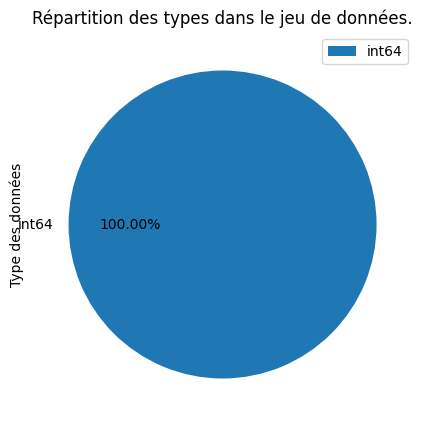


###### Les 5 premières et dernières lignes ######



,article_id,category_id,created_at_ts,publisher_id,words_count
0,0,0,1513144419000,0,168
1,1,1,1405341936000,0,189
2,2,1,1408667706000,0,250
3,3,1,1408468313000,0,230
4,4,1,1407071171000,0,162


,article_id,category_id,created_at_ts,publisher_id,words_count
364042,364042,460,1434034118000,0,144
364043,364043,460,1434148472000,0,463
364044,364044,460,1457974279000,0,177
364045,364045,460,1515964737000,0,126
364046,364046,460,1505811330000,0,479



###### Nombre de valeurs uniques ######



,article_id,category_id,created_at_ts,publisher_id,words_count
0,364047,461,359552,1,866



###### Doublons génériques (toutes les variables sont utilisées) ######



np.int64(0)


###### Doublons sans l'index ######



np.int64(6)


###### Informations du taux de remplissage ######



Index(['article_id', 'category_id', 'created_at_ts', 'publisher_id',
       'words_count'],
      dtype='object')

array([100., 100., 100., 100., 100.])

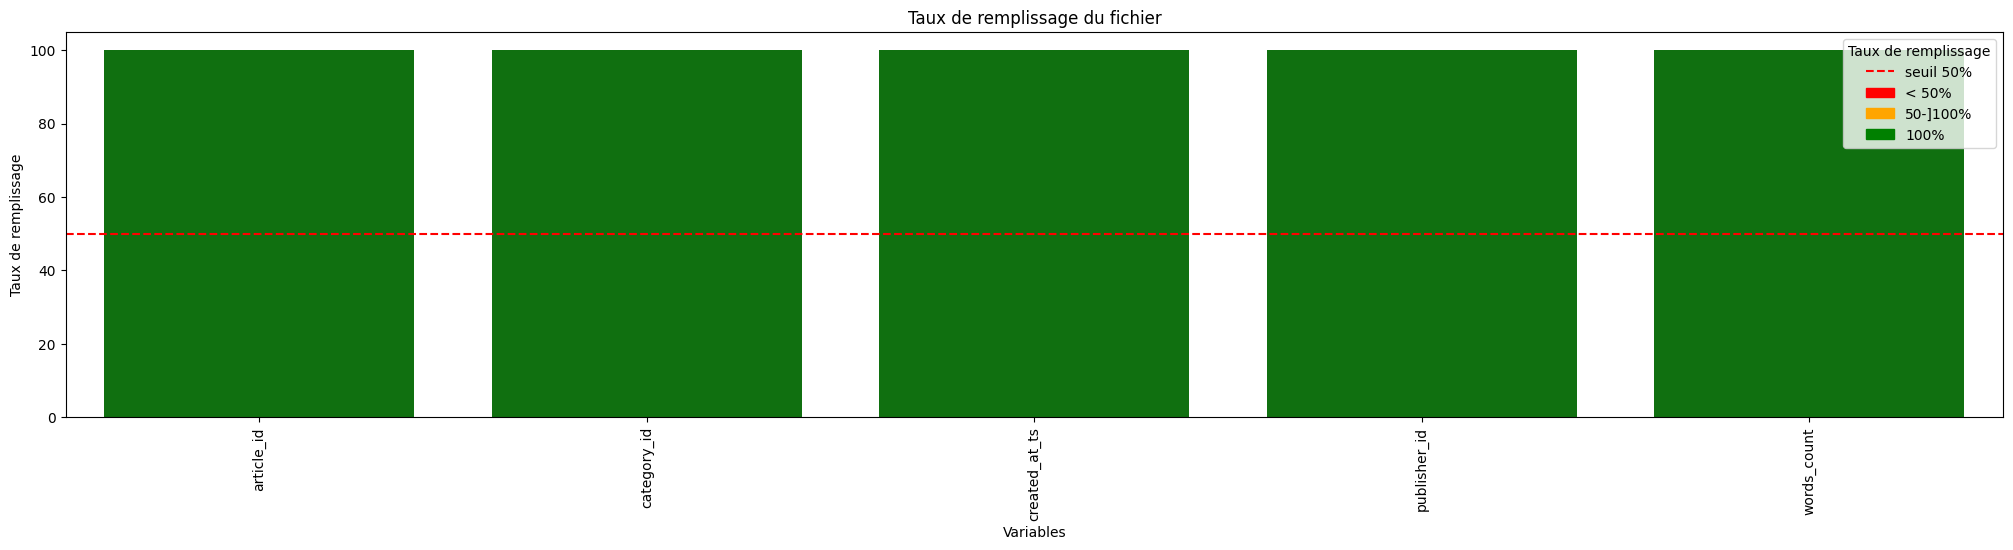

,Variable,% Taux remplissage



###### Statistiques descriptives ######



,article_id,category_id,created_at_ts,publisher_id,words_count
count,364047.000000,364047.000000,3.640470e+05,364047.0,364047.000000
mean,182023.000000,283.108239,1.474070e+12,0.0,190.897727
std,105091.461061,136.723470,4.293038e+10,0.0,59.502766
min,0.000000,0.000000,1.159356e+12,0.0,0.000000
25%,91011.500000,199.000000,1.444925e+12,0.0,159.000000
50%,182023.000000,301.000000,1.489422e+12,0.0,186.000000
75%,273034.500000,399.000000,1.509891e+12,0.0,218.000000
max,364046.000000,460.000000,1.520943e+12,0.0,6690.000000



###### Boxplots des variables ######



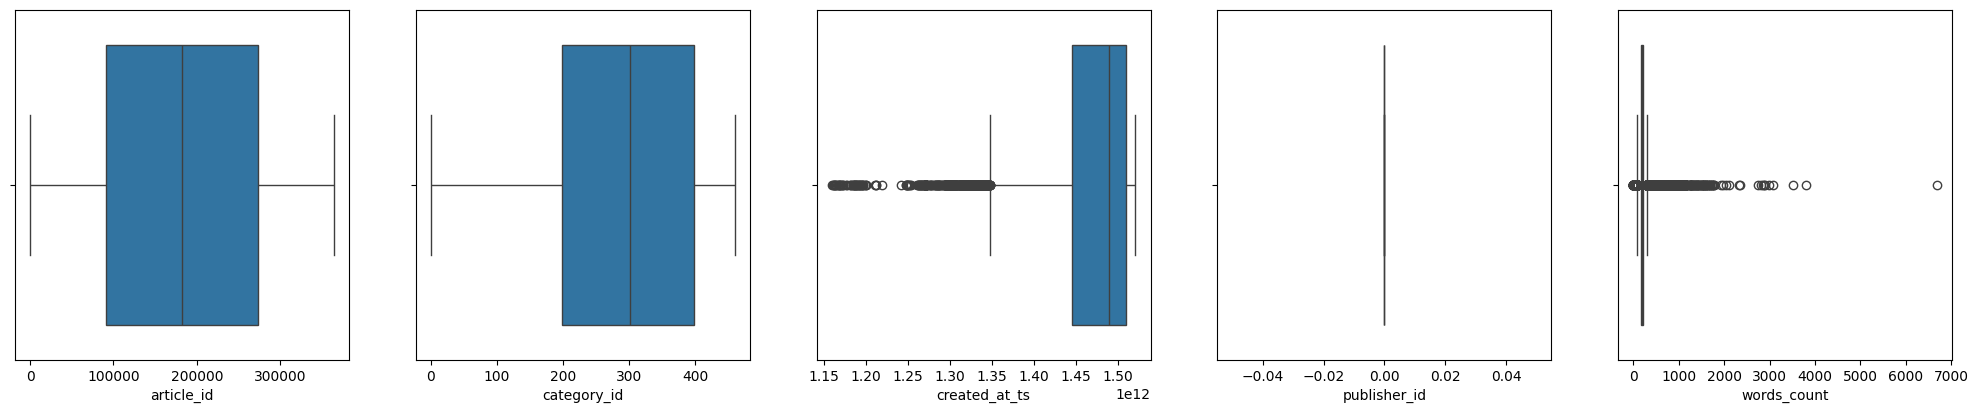

In [8]:
analyse_exploratoire_generique(df_articles)

### Clicks_hour


###### Informations générales ######

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2988181 entries, 0 to 2988180
Data columns (total 12 columns):
 #   Column               Dtype
---  ------               -----
 0   user_id              int64
 1   session_id           int64
 2   session_start        int64
 3   session_size         int64
 4   click_article_id     int64
 5   click_timestamp      int64
 6   click_environment    int64
 7   click_deviceGroup    int64
 8   click_os             int64
 9   click_country        int64
 10  click_region         int64
 11  click_referrer_type  int64
dtypes: int64(12)
memory usage: 273.6 MB

###### Répartition des types dans le dataset ######

int64    12
Name: count, dtype: int64


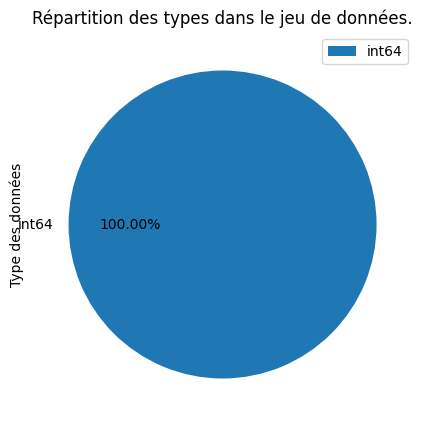


###### Les 5 premières et dernières lignes ######



,user_id,session_id,session_start,session_size,click_article_id,click_timestamp,click_environment,click_deviceGroup,click_os,click_country,click_region,click_referrer_type
0,0,1506825423271737,1506825423000,2,157541,1506826828020,4,3,20,1,20,2
1,0,1506825423271737,1506825423000,2,68866,1506826858020,4,3,20,1,20,2
2,1,1506825426267738,1506825426000,2,235840,1506827017951,4,1,17,1,16,2
3,1,1506825426267738,1506825426000,2,96663,1506827047951,4,1,17,1,16,2
4,2,1506825435299739,1506825435000,2,119592,1506827090575,4,1,17,1,24,2


,user_id,session_id,session_start,session_size,click_article_id,click_timestamp,click_environment,click_deviceGroup,click_os,click_country,click_region,click_referrer_type
2988176,10051,1508211372158328,1508211372000,2,84911,1508211557302,4,3,2,1,25,1
2988177,322896,1508211376302329,1508211376000,2,30760,1508211672520,4,1,17,1,25,2
2988178,322896,1508211376302329,1508211376000,2,157507,1508211702520,4,1,17,1,25,2
2988179,123718,1508211379189330,1508211379000,2,234481,1508211513583,4,3,2,1,25,2
2988180,123718,1508211379189330,1508211379000,2,233578,1508211543583,4,3,2,1,25,2



###### Nombre de valeurs uniques ######



,user_id,session_id,session_start,session_size,click_article_id,click_timestamp,click_environment,click_deviceGroup,click_os,click_country,click_region,click_referrer_type
0,322897,1048594,646874,72,46033,2983198,3,5,8,11,28,7



###### Doublons génériques (toutes les variables sont utilisées) ######



np.int64(0)


###### Doublons sans l'index ######



np.int64(0)


###### Informations du taux de remplissage ######



Index(['user_id', 'session_id', 'session_start', 'session_size',
       'click_article_id', 'click_timestamp', 'click_environment',
       'click_deviceGroup', 'click_os', 'click_country', 'click_region',
       'click_referrer_type'],
      dtype='object')

array([100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100.])

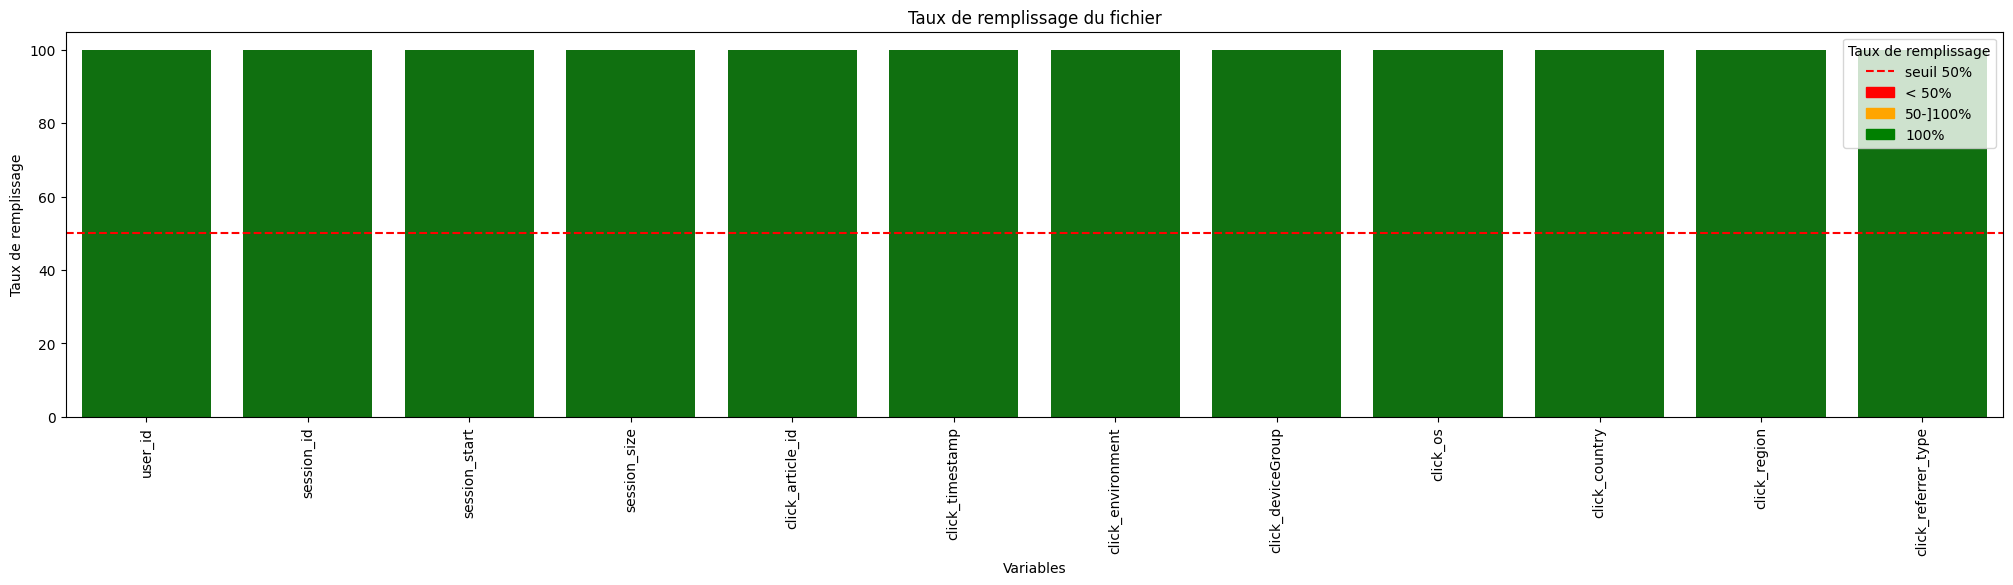

,Variable,% Taux remplissage



###### Statistiques descriptives ######



,user_id,session_id,session_start,session_size,click_article_id,click_timestamp,click_environment,click_deviceGroup,click_os,click_country,click_region,click_referrer_type
count,2.988181e+06,2.988181e+06,2.988181e+06,2.988181e+06,2.988181e+06,2.988181e+06,2.988181e+06,2.988181e+06,2.988181e+06,2.988181e+06,2.988181e+06,2.988181e+06
mean,1.079478e+05,1.507472e+15,1.507472e+12,3.901885e+00,1.949226e+05,1.507474e+12,3.942652e+00,1.819306e+00,1.327760e+01,1.357656e+00,1.831331e+01,1.838981e+00
std,8.364836e+04,3.855245e+11,3.855245e+08,3.929941e+00,9.076842e+04,3.858510e+08,3.396804e-01,1.042214e+00,6.881718e+00,1.725861e+00,7.064006e+00,1.156356e+00
min,0.000000e+00,1.506825e+15,1.506825e+12,2.000000e+00,3.000000e+00,1.506827e+12,1.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,4.034100e+04,1.507124e+15,1.507124e+12,2.000000e+00,1.242280e+05,1.507127e+12,4.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,1.300000e+01,1.000000e+00
50%,8.622900e+04,1.507493e+15,1.507493e+12,3.000000e+00,2.023810e+05,1.507495e+12,4.000000e+00,1.000000e+00,1.700000e+01,1.000000e+00,2.100000e+01,2.000000e+00
75%,1.632610e+05,1.507749e+15,1.507749e+12,4.000000e+00,2.770670e+05,1.507751e+12,4.000000e+00,3.000000e+00,1.700000e+01,1.000000e+00,2.500000e+01,2.000000e+00
max,3.228960e+05,1.508211e+15,1.508211e+12,1.240000e+02,3.640460e+05,1.510603e+12,4.000000e+00,5.000000e+00,2.000000e+01,1.100000e+01,2.800000e+01,7.000000e+00


KeyboardInterrupt: 

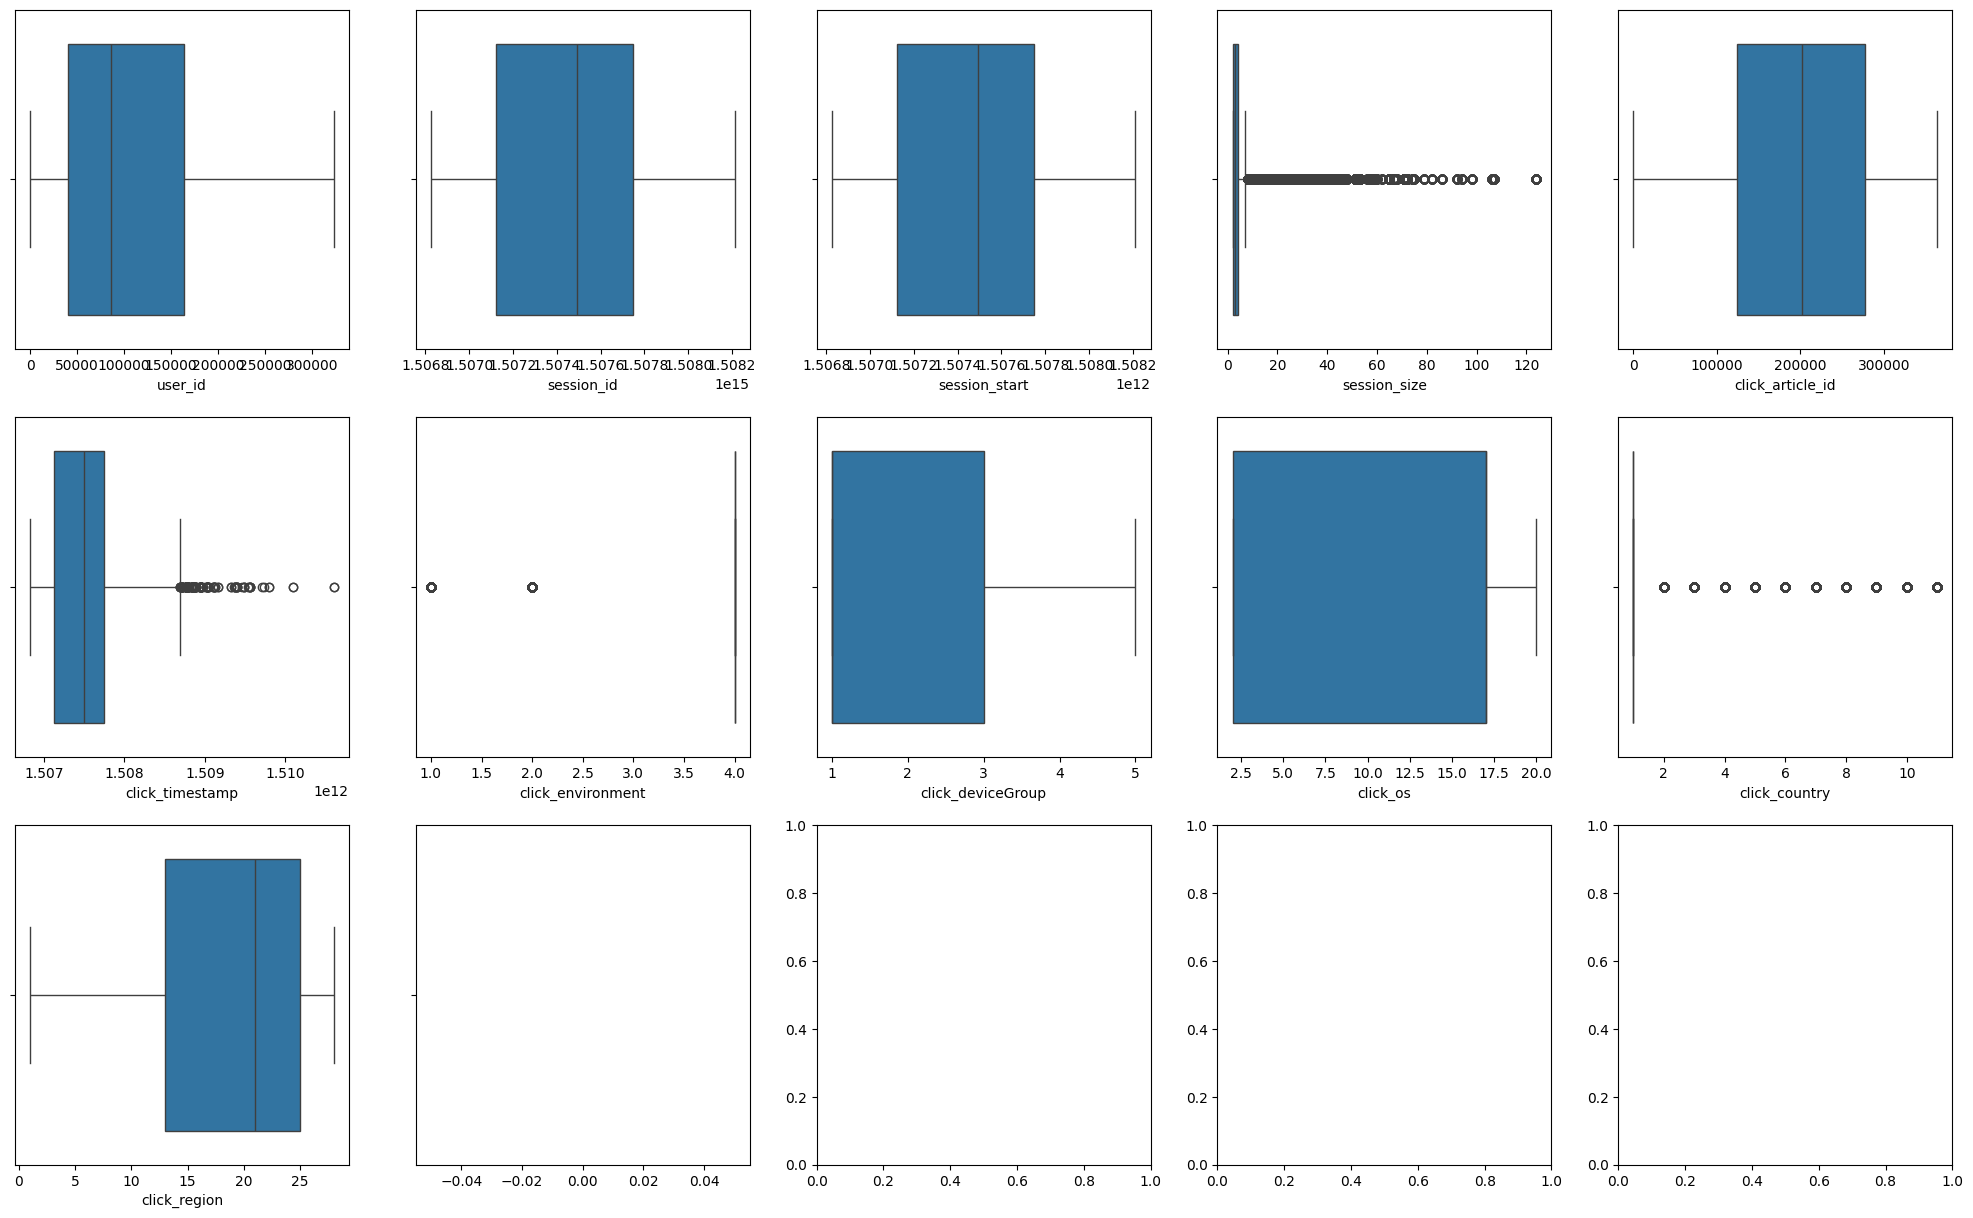

In [9]:
analyse_exploratoire_generique(df_clicks_hour)

### Full


###### Informations générales ######

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2988181 entries, 0 to 2988180
Data columns (total 16 columns):
 #   Column               Dtype
---  ------               -----
 0   user_id              int64
 1   session_id           int64
 2   session_start        int64
 3   session_size         int64
 4   click_article_id     int64
 5   click_timestamp      int64
 6   click_environment    int64
 7   click_deviceGroup    int64
 8   click_os             int64
 9   click_country        int64
 10  click_region         int64
 11  click_referrer_type  int64
 12  category_id          int64
 13  created_at_ts        int64
 14  publisher_id         int64
 15  words_count          int64
dtypes: int64(16)
memory usage: 364.8 MB

###### Répartition des types dans le dataset ######

int64    16
Name: count, dtype: int64


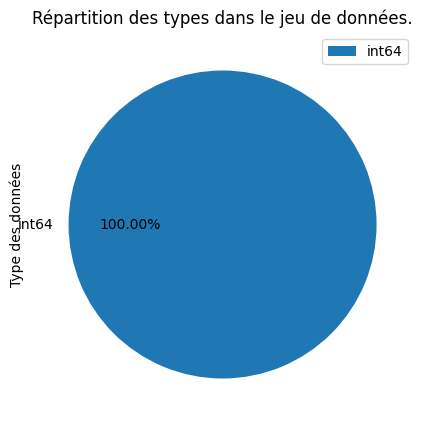


###### Les 5 premières et dernières lignes ######



,user_id,session_id,session_start,session_size,click_article_id,click_timestamp,click_environment,click_deviceGroup,click_os,click_country,click_region,click_referrer_type,category_id,created_at_ts,publisher_id,words_count
0,0,1506825423271737,1506825423000,2,157541,1506826828020,4,3,20,1,20,2,281,1506800518000,0,280
1,0,1506825423271737,1506825423000,2,68866,1506826858020,4,3,20,1,20,2,136,1506816482000,0,226
2,1,1506825426267738,1506825426000,2,235840,1506827017951,4,1,17,1,16,2,375,1506807839000,0,159
3,1,1506825426267738,1506825426000,2,96663,1506827047951,4,1,17,1,16,2,209,1506788025000,0,206
4,2,1506825435299739,1506825435000,2,119592,1506827090575,4,1,17,1,24,2,247,1506784316000,0,239


,user_id,session_id,session_start,session_size,click_article_id,click_timestamp,click_environment,click_deviceGroup,click_os,click_country,click_region,click_referrer_type,category_id,created_at_ts,publisher_id,words_count
2988176,10051,1508211372158328,1508211372000,2,84911,1508211557302,4,3,2,1,25,1,174,1508187619000,0,171
2988177,322896,1508211376302329,1508211376000,2,30760,1508211672520,4,1,17,1,25,2,26,1508185091000,0,162
2988178,322896,1508211376302329,1508211376000,2,157507,1508211702520,4,1,17,1,25,2,281,1508236945000,0,370
2988179,123718,1508211379189330,1508211379000,2,234481,1508211513583,4,3,2,1,25,2,375,1508181572000,0,212
2988180,123718,1508211379189330,1508211379000,2,233578,1508211543583,4,3,2,1,25,2,375,1508176010000,0,174



###### Nombre de valeurs uniques ######



,user_id,session_id,session_start,session_size,click_article_id,click_timestamp,click_environment,click_deviceGroup,click_os,click_country,click_region,click_referrer_type,category_id,created_at_ts,publisher_id,words_count
0,322897,1048594,646874,72,46033,2983198,3,5,8,11,28,7,316,45785,1,536



###### Doublons génériques (toutes les variables sont utilisées) ######



np.int64(0)


###### Doublons sans l'index ######



np.int64(0)


###### Informations du taux de remplissage ######



Index(['user_id', 'session_id', 'session_start', 'session_size',
       'click_article_id', 'click_timestamp', 'click_environment',
       'click_deviceGroup', 'click_os', 'click_country', 'click_region',
       'click_referrer_type', 'category_id', 'created_at_ts', 'publisher_id',
       'words_count'],
      dtype='object')

array([100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100.])

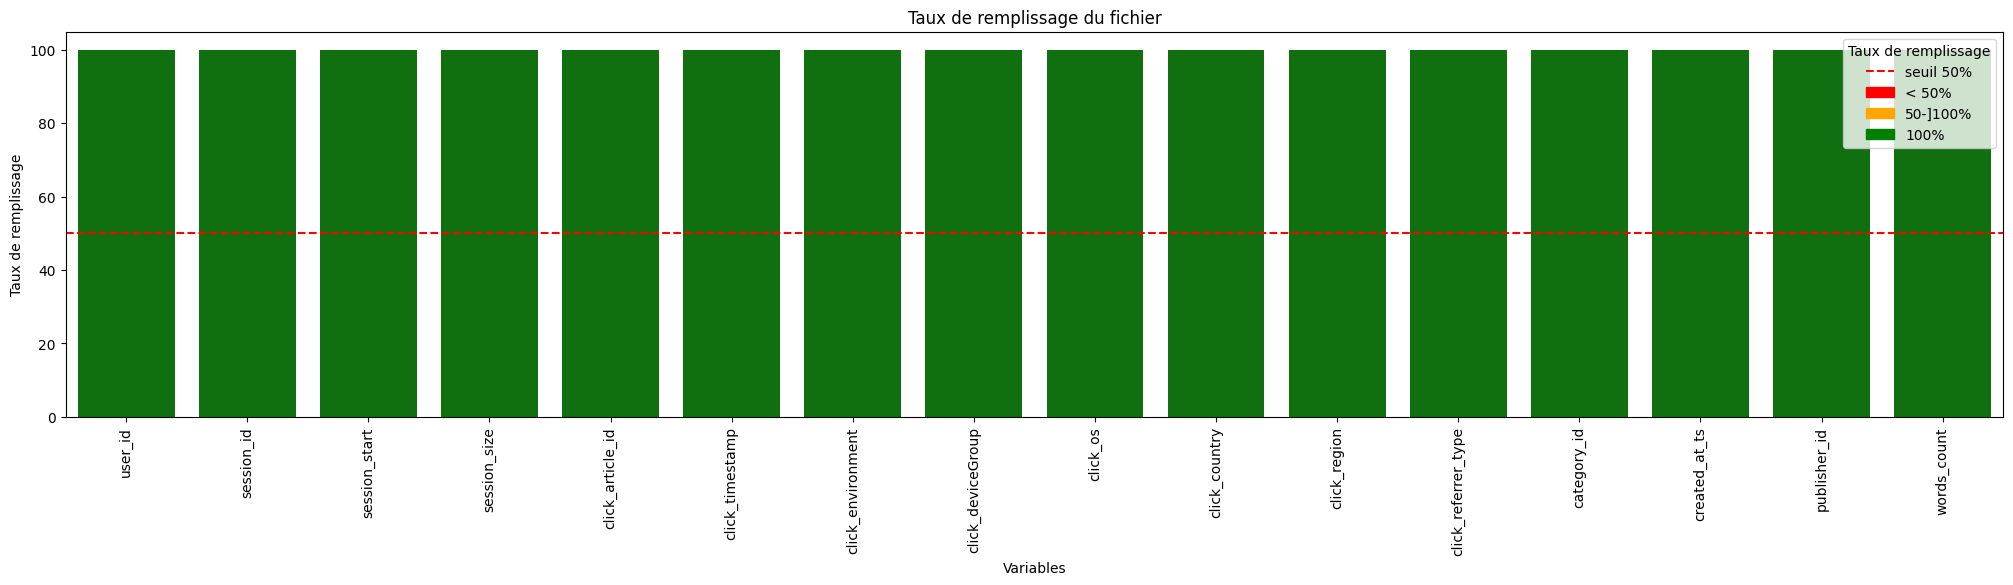

,Variable,% Taux remplissage



###### Statistiques descriptives ######



,user_id,session_id,session_start,session_size,click_article_id,click_timestamp,click_environment,click_deviceGroup,click_os,click_country,click_region,click_referrer_type,category_id,created_at_ts,publisher_id,words_count
count,2.988181e+06,2.988181e+06,2.988181e+06,2.988181e+06,2.988181e+06,2.988181e+06,2.988181e+06,2.988181e+06,2.988181e+06,2.988181e+06,2.988181e+06,2.988181e+06,2.988181e+06,2.988181e+06,2988181.0,2.988181e+06
mean,1.079478e+05,1.507472e+15,1.507472e+12,3.901885e+00,1.949226e+05,1.507474e+12,3.942652e+00,1.819306e+00,1.327760e+01,1.357656e+00,1.831331e+01,1.838981e+00,3.059382e+02,1.506751e+12,0.0,2.086283e+02
std,8.364836e+04,3.855245e+11,3.855245e+08,3.929941e+00,9.076842e+04,3.858510e+08,3.396804e-01,1.042214e+00,6.881718e+00,1.725861e+00,7.064006e+00,1.156356e+00,1.130805e+02,7.068639e+09,0.0,8.160152e+01
min,0.000000e+00,1.506825e+15,1.506825e+12,2.000000e+00,3.000000e+00,1.506827e+12,1.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.166573e+12,0.0,0.000000e+00
25%,4.034100e+04,1.507124e+15,1.507124e+12,2.000000e+00,1.242280e+05,1.507127e+12,4.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,1.300000e+01,1.000000e+00,2.500000e+02,1.507053e+12,0.0,1.730000e+02
50%,8.622900e+04,1.507493e+15,1.507493e+12,3.000000e+00,2.023810e+05,1.507495e+12,4.000000e+00,1.000000e+00,1.700000e+01,1.000000e+00,2.100000e+01,2.000000e+00,3.270000e+02,1.507403e+12,0.0,1.980000e+02
75%,1.632610e+05,1.507749e+15,1.507749e+12,4.000000e+00,2.770670e+05,1.507751e+12,4.000000e+00,3.000000e+00,1.700000e+01,1.000000e+00,2.500000e+01,2.000000e+00,4.090000e+02,1.507717e+12,0.0,2.320000e+02
max,3.228960e+05,1.508211e+15,1.508211e+12,1.240000e+02,3.640460e+05,1.510603e+12,4.000000e+00,5.000000e+00,2.000000e+01,1.100000e+01,2.800000e+01,7.000000e+00,4.600000e+02,1.510666e+12,0.0,6.690000e+03



###### Boxplots des variables ######



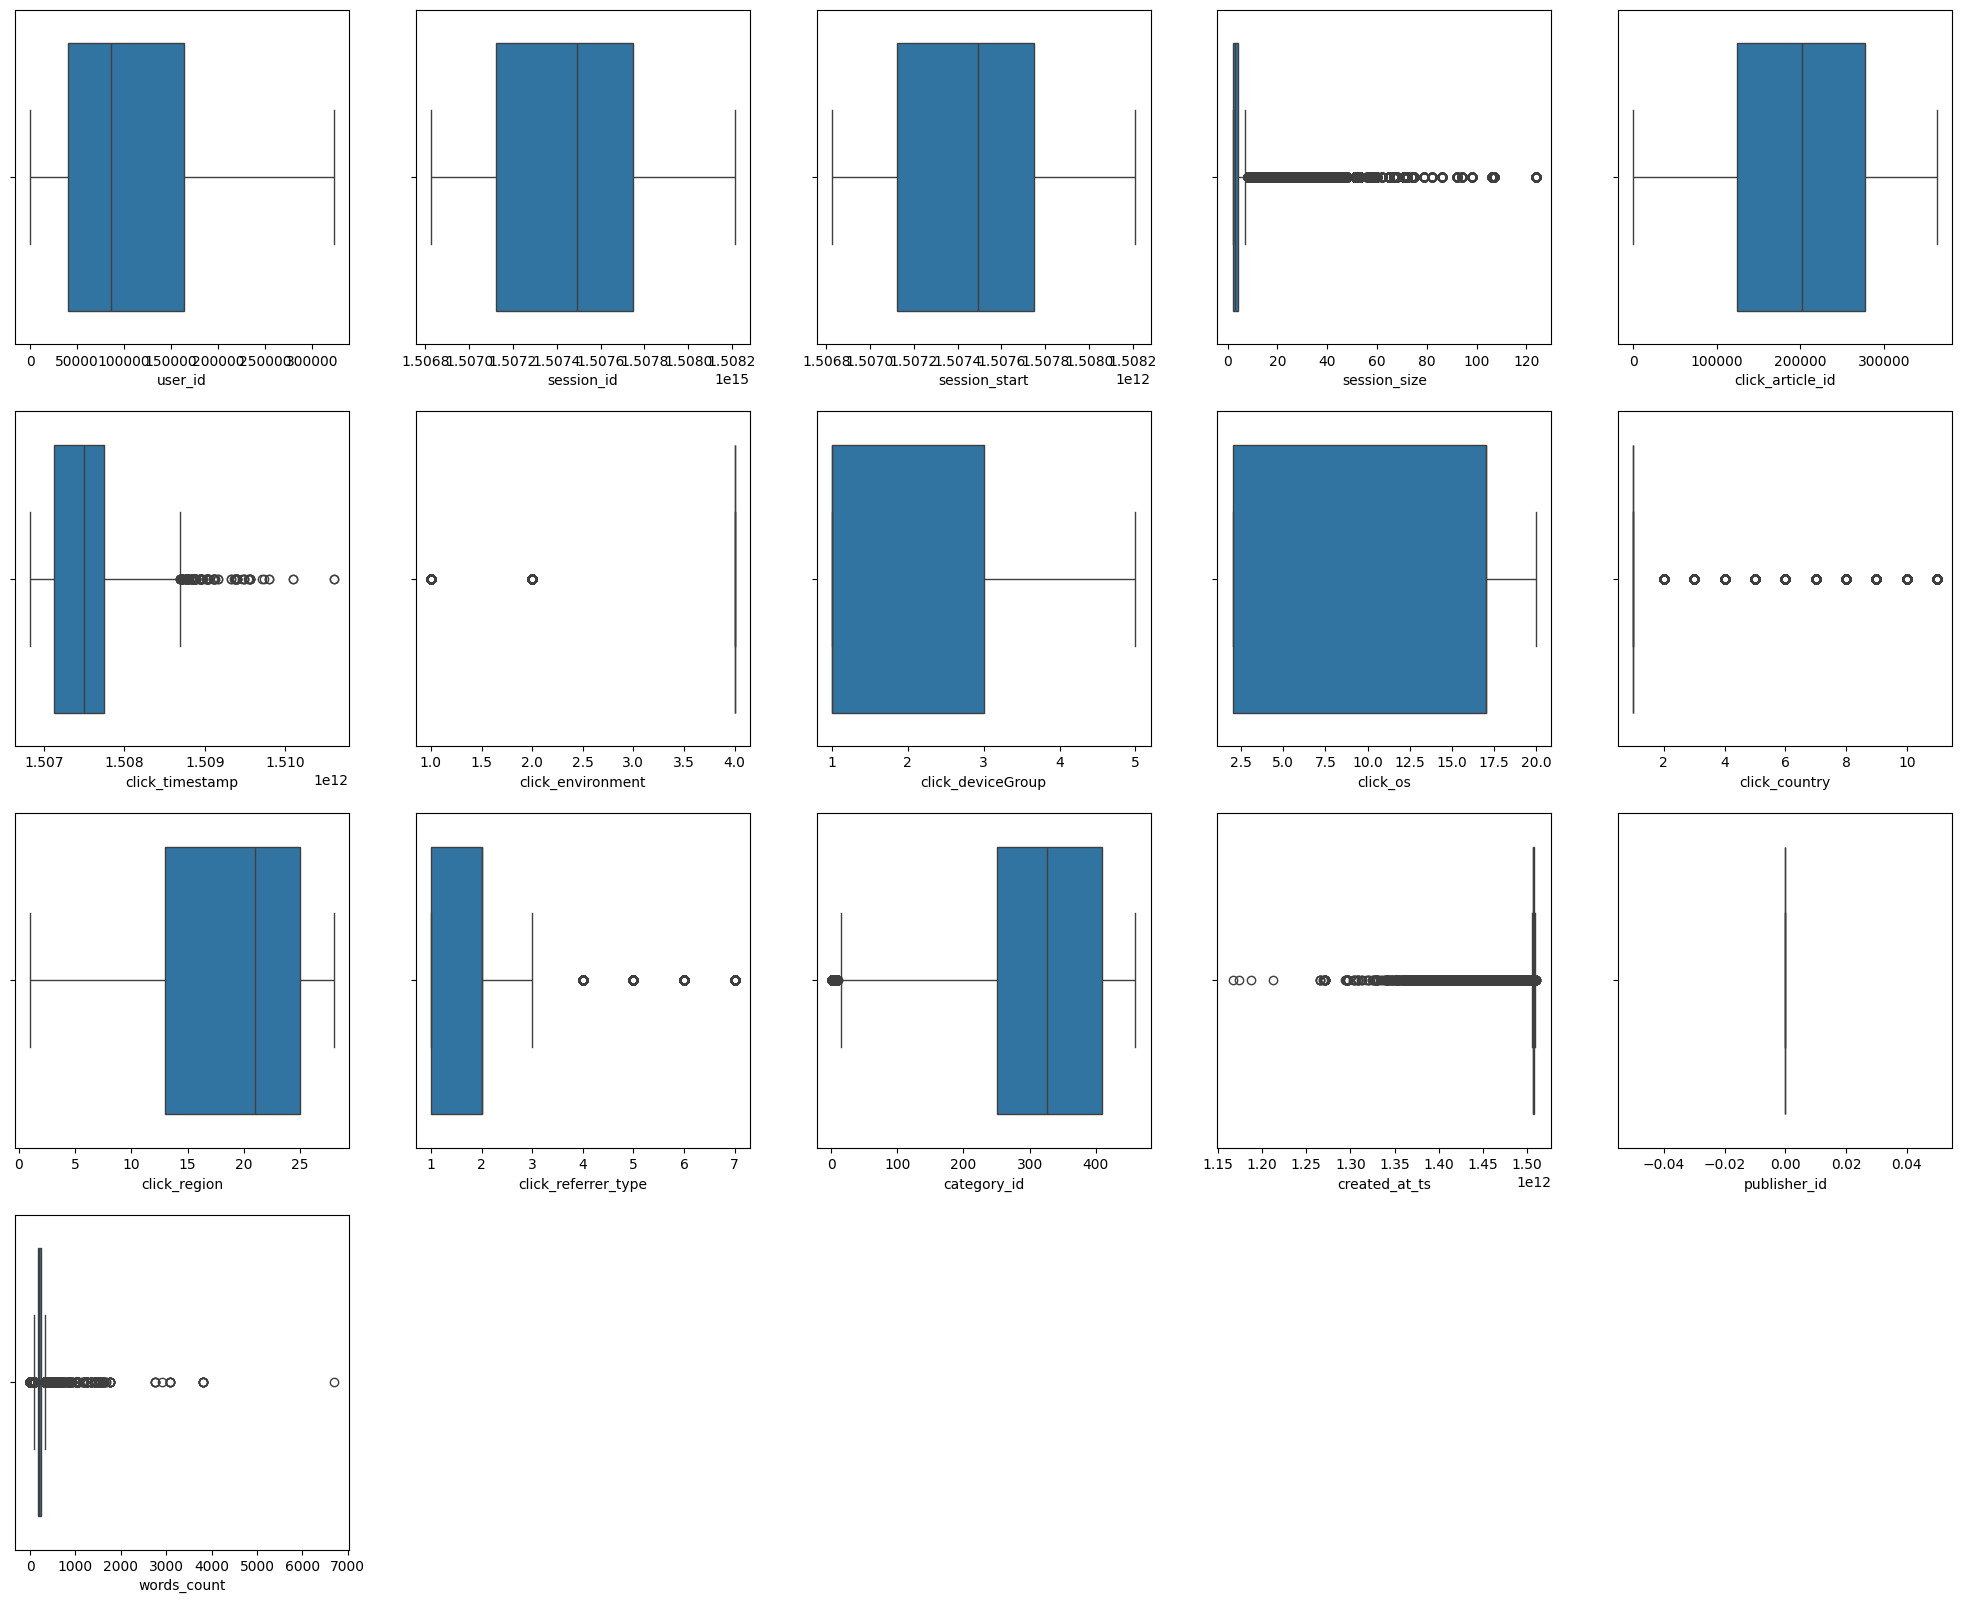

In [9]:
analyse_exploratoire_generique(df_full)

### Analyses bivariés

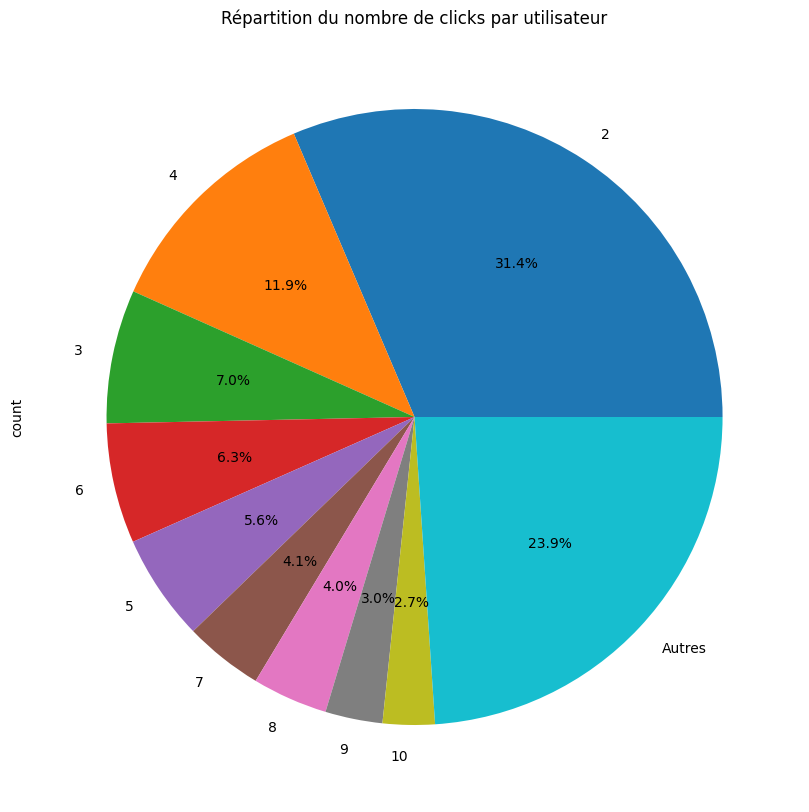

In [94]:
nb_clicks_per_user = df_full.groupby("user_id").size()
click_distribution = nb_clicks_per_user.value_counts().sort_values(ascending=False)
tops_click_distribution = click_distribution.head(9)
tops_click_distribution["Autres"] = click_distribution[9:].sum()
tops_click_distribution.plot(kind="pie", autopct="%1.1f%%", figsize=(10, 10), title="Répartition du nombre de clicks par utilisateur")
plt.show()

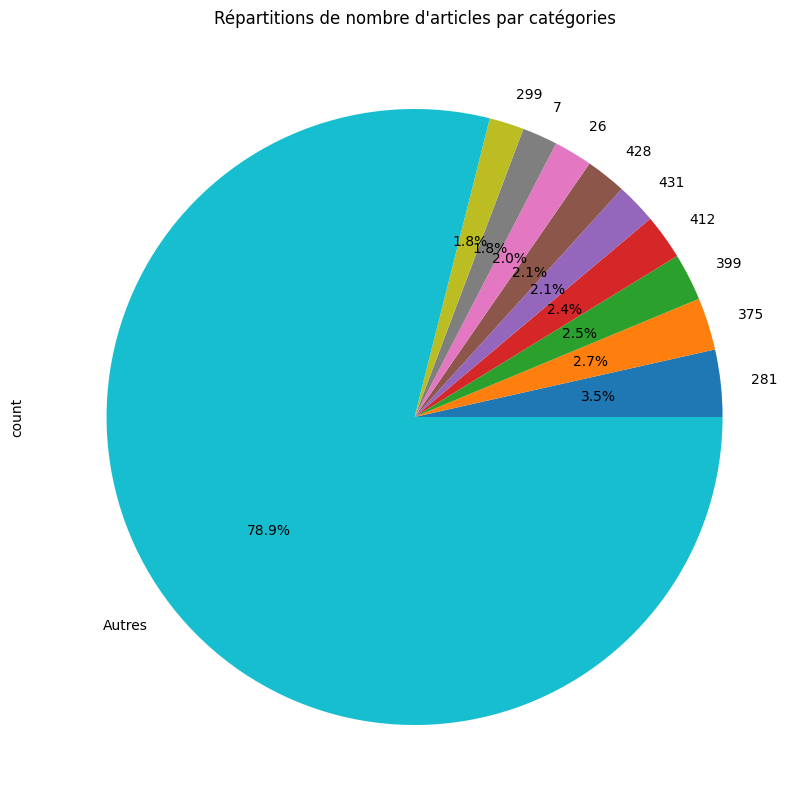

In [97]:
nb_articles_per_category = df_articles["category_id"].value_counts().sort_values(ascending=False)
highest_nb_articles_category = nb_articles_per_category.head(9)
others = nb_articles_per_category.iloc[9:].sum()
highest_nb_articles_category["Autres"] = others
highest_nb_articles_category.plot(kind="pie", autopct="%1.1f%%", title="Répartitions de nombre d'articles par catégories", figsize=(10, 10))
plt.show()


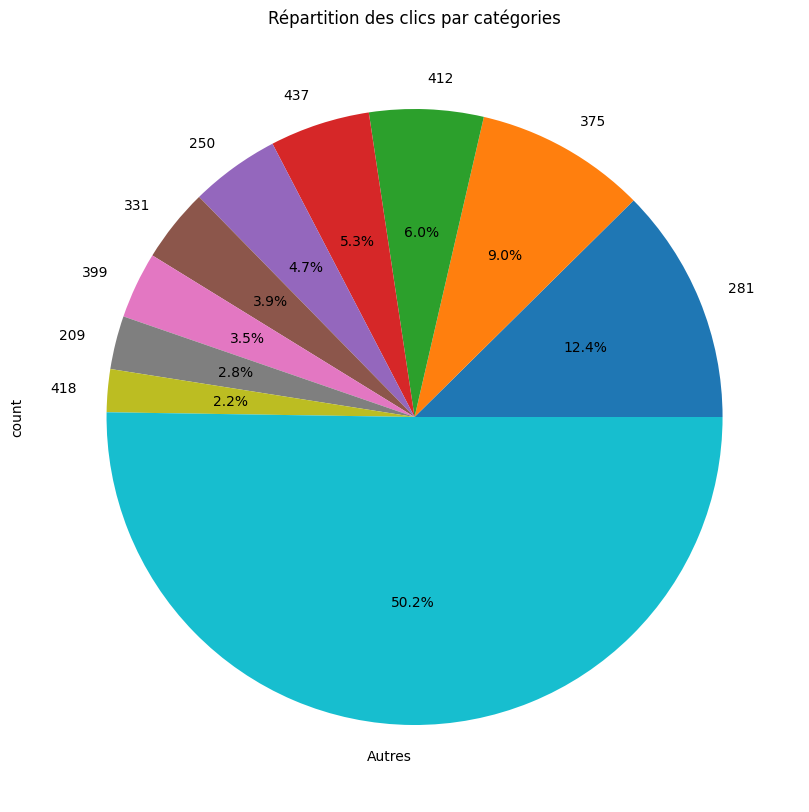

In [ ]:
nb_clicks_per_categories = df_full["category_id"].value_counts().sort_values(ascending=False)
most_clicked_categories = nb_clicks_per_categories.head(9)
others = nb_clicks_per_categories.iloc[9:].sum()
most_clicked_categories["Autres"] = others
most_clicked_categories.plot(kind="pie", autopct="%1.1f%%", title="Répartition des clics par catégories", figsize=(10, 10))
plt.show()

In [13]:
target_vars = ["user_id", "category_id"]
df_full.groupby(target_vars).agg({"click_article_id":"count"}).sort_values(by=["user_id", "click_article_id"], ascending=[True, False])

click_article_id
user_id category_id                  
0       186                         2
        281                         2
        136                         1
        209                         1
        375                         1
...                               ...
322894  297                         1
322895  133                         1
        418                         1
322896  26                          1
        281                         1

[1882302 rows x 1 columns]

In [14]:
target_vars = ["click_environment", "category_id"]
click_environment_category = df_full.groupby(target_vars).agg({"click_article_id":"count"}).sort_values(by=["click_environment", "click_article_id"], ascending=[True, False])
click_environment_category.reset_index(inplace=True)
click_environment_category.rename(columns={"click_article_id": "nb_clicks"}, inplace=True)
click_environment_category

,click_environment,category_id,nb_clicks
0,1,186,1305
1,1,228,734
2,1,187,156
3,1,225,130
4,1,137,107
...,...,...,...
599,4,401,1
600,4,405,1
601,4,407,1
602,4,414,1


In [15]:
click_environment_category[["click_environment", "nb_clicks"]].groupby("click_environment").sum()

,nb_clicks
click_environment,
1,3960
2,79743
4,2904478


In [16]:
for i in click_environment_category["click_environment"].unique():
    display_nb_click_environment = click_environment_category[["category_id", "nb_clicks"]][click_environment_category["click_environment"] == i].groupby("category_id").sum()
    display_nb_click_environment.reset_index(inplace=True)
    display_nb_click_environment.sort_values(by="nb_clicks", ascending=False, inplace=True)
    display(display_nb_click_environment.head())

,category_id,nb_clicks
43,186,1305
57,228,734
44,187,156
55,225,130
31,137,107


,category_id,nb_clicks
80,281,9394
113,375,7983
133,412,4833
100,331,4734
145,437,4395


,category_id,nb_clicks
190,281,361347
251,375,260209
280,412,174000
298,437,152650
165,250,137058


In [ ]:
target_vars = ["click_country", "category_id"]
click_country_category = df_full.groupby(target_vars).agg({"click_article_id":"count"}).sort_values(by=["click_country", "click_article_id"], ascending=[True, False])
click_country_category.reset_index(inplace=True)
click_country_category.rename(columns={"click_article_id": "nb_clicks"}, inplace=True)
click_country_category

,click_country,category_id,nb_clicks
0,1,281,344203
1,1,375,256791
2,1,412,170872
3,1,437,150069
4,1,250,134762
...,...,...,...
1582,11,278,1
1583,11,288,1
1584,11,322,1
1585,11,406,1


In [18]:
click_country_category[["click_country", "nb_clicks"]].groupby("click_country").sum()

,nb_clicks
click_country,
1,2852406
2,6101
3,4540
4,3389
5,3498
6,7256
7,3313
8,9556
9,6746


In [19]:
for i in click_country_category["click_country"].unique():
    display_nb_click_country = click_country_category[["category_id", "nb_clicks"]][click_country_category["click_country"] == i].groupby("category_id").sum()
    display_nb_click_country.reset_index(inplace=True)
    display_nb_click_country.sort_values(by="nb_clicks", ascending=False, inplace=True)
    display(display_nb_click_country.head())

,category_id,nb_clicks
191,281,344203
251,375,256791
280,412,170872
298,437,150069
166,250,134762


,category_id,nb_clicks
57,281,1339
85,375,529
101,412,369
50,250,314
112,437,288


,category_id,nb_clicks
59,281,891
84,375,350
99,412,305
111,437,223
50,250,222


,category_id,nb_clicks
56,281,673
85,375,313
110,437,204
99,412,165
48,250,154


,category_id,nb_clicks
57,281,619
84,375,304
107,437,192
97,412,179
48,250,171


,category_id,nb_clicks
59,281,1457
85,375,595
102,412,424
114,437,381
51,250,280


,category_id,nb_clicks
53,281,566
75,375,314
91,412,201
102,437,198
45,250,169


,category_id,nb_clicks
60,281,1616
118,437,636
107,412,622
89,375,609
52,250,370


,category_id,nb_clicks
65,281,1212
94,375,711
108,412,385
56,250,340
120,437,337


,category_id,nb_clicks
86,281,12714
121,375,5131
139,412,3613
151,437,3000
75,250,2367


,category_id,nb_clicks
79,281,5553
113,375,2610
132,412,1759
144,437,1557
69,250,1305
